In [1]:
#Importamos librerias base
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importamos el modelo de clasificación y las métricas
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

#Para la visualización
import graphviz 
import pydotplus
from IPython.display import Image

In [2]:
#Levantamos el df_final_alternativo_2
df_final_alternativo_2 = pd.read_csv('df_final_alternativo_2.csv')

#Generamos el X y el target
Xa = df_final_alternativo_2.drop(['ClasificacionNum2', 'ID', 'fid', 'Numero', 'lee_y _esc', 'NoLee_ni_e', 'totalpobl','Primario','Inicial (j','Secundario','EGB', 'Universita','Post unive', 'Superior n','Polimodal'], axis = 1)
ya = df_final_alternativo_2['ClasificacionNum2']

#Estandarizamos con MinMax todo el set de datos X
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(Xa)

In [ ]:
corr = df_final_alternativo_2.corr(method='pearson')

plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)
plt.show()

In [3]:
#Porcentaje de etiquetas en el train
ya_train.value_counts() / ya_train.shape[0]

NameError: name 'ya_train' is not defined

In [ ]:
# Porcentaje de etiquetas en el test 
ya_test.value_counts() / ya_test.shape[0]

Quizás podemos utilizar las herramientas de undersampling / oversampling para homogeneizar las etiquetas

In [4]:
#Inicializamos el modelo
clftree = tree.DecisionTreeClassifier()

In [ ]:
#Divimos en train y en test
#Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, stratify=ya, test_size= 0.25)

#Xa_train_std = scaler.fit_transform(Xa_train)
#Xa_test_std = scaler.fit_transform(Xa_test)

In [5]:
#Hagamos un GridSearch con esta grilla
params_grid = { "criterion" : ["gini", "entropy"],
                "min_samples_leaf": [5,10,15,20,None], 
                "max_depth" : [1,2,3,4,5,6,8,9,10,11,12,13,14,None],
                "min_samples_split": [2, 3, 4,None]}

In [29]:
grid_search = GridSearchCV(clftree, params_grid,
                           n_jobs=-1, scoring='accuracy', cv= 10)

In [ ]:
#grid_search.fit(Xa_train_std, ya_train)

In [ ]:
#grid_search.best_params_

In [30]:
#Hacemos Stratified K-folds para X
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []
  
for train_index, test_index in skf.split(Xa, ya):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = ya[train_index], ya[test_index]
    grid_search.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(grid_search.score(x_test_fold, y_test_fold))

In [31]:
#Vemos los resultados
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      np.mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', np.std(lst_accu_stratified))

List of possible accuracy: [0.7317073170731707, 0.7195121951219512, 0.7804878048780488, 0.7439024390243902, 0.8170731707317073, 0.7439024390243902, 0.7195121951219512, 0.7195121951219512, 0.7530864197530864, 0.7901234567901234]

Maximum Accuracy That can be obtained from this model is: 81.70731707317073 %

Minimum Accuracy: 71.95121951219512 %

Overall Accuracy: 75.1881963264077 %

Standard Deviation is: 0.03195280563566291


In [32]:
cv_clf = grid_search.best_estimator_
cv_clf

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5)

In [10]:
pd.DataFrame({'atributo':Xa.columns, 'importancia':cv_clf.feature_importances_}).sort_values('importancia', ascending = False)

,atributo,importancia
0,CantidadNum,1.0
11,Seccion,0.0
19,macroz_2_Residencial urbano,0.0
18,macroz_2_Residencial suburbano,0.0
17,macroz_2_Especial Parque Gral. San Marti?n,0.0
16,macroz_2_Comercial,0.0
15,"TipoResiduo_Vidrio, Metal, Tetra",0.0
14,TipoResiduo_Plástico,0.0
13,TipoResiduo_Papel,0.0
12,Tipo de punto_Rulero,0.0


In [15]:
#Score para el test
accuracy_score(y_test_fold, cv_clf.predict(x_test_fold))

0.7901234567901234

In [23]:
#Matriz de confusion
confusion_matrix(y_test_fold, cv_clf.predict(x_test_fold))

array([[57,  0],
       [17,  7]], dtype=int64)

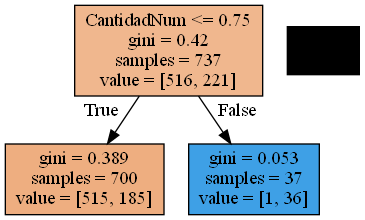

In [26]:
#Visualizamos el árbol
dot_data = tree.export_graphviz(cv_clf, out_file=None,feature_names= Xa.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

Vamos a aplicar ahora la tecnica de random forest, para ello utilicemos el ultimo arbol simple creado.

In [27]:
#Importamos el modelo 
from sklearn.ensemble import RandomForestClassifier

In [28]:
#Instanciamos el modelo y ajustamos los datos 
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rf_clf.fit(Xa_train_std, ya_train)

NameError: name 'Xa_train_std' is not defined

In [ ]:
#Vemos accuracy y matriz de confusión
print('Accuracy :' ,accuracy_score(ya_test, rf_clf.predict(Xa_test_std)))
print('')
print('Y la matriz:')
print('')
print(confusion_matrix(ya_test, rf_clf.predict(Xa_test_std)))

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
bag_clf.fit(Xa_train_std, ya_train)

In [ ]:
accuracy_score(ya_test, bag_clf.predict(Xa_test_std))